<a href="https://colab.research.google.com/github/anitashar/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/ANITA_SHARMA_Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline

In [0]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use

<function matplotlib.style.core.use>

In [0]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-ticks',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-bright',
 'tableau-colorblind10',
 'bmh',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-whitegrid',
 'fast',
 'classic',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-poster',
 '_classic_test',
 'seaborn-muted',
 'dark_background']

In [0]:
# Read in the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()




,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
# cabin class is a categorical variable
# it can be displayed using either number or string values.'
df['cabin_class']= df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


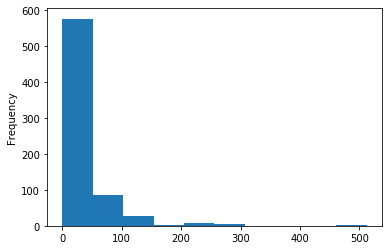

In [0]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

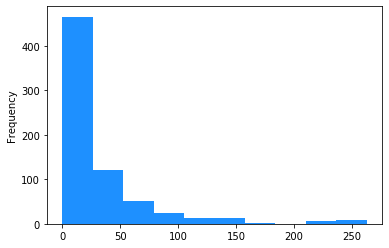

In [0]:
# Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='dodgerblue');


In [0]:
# A continuous variable can be converted to a categorical var using binning.
# 

farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults


low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

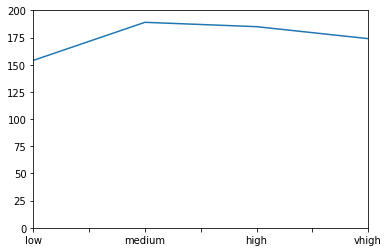

In [0]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
# myresults.plot();
myresults.plot(ylim=(0,200));

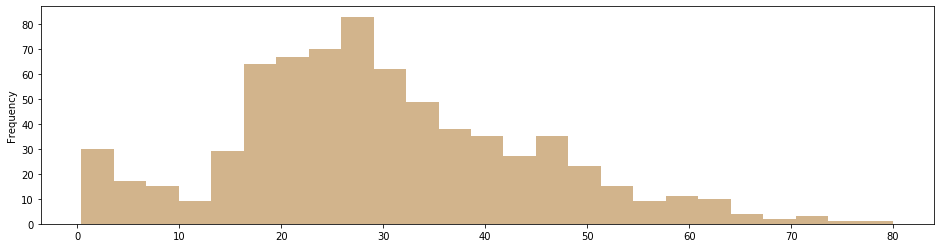

In [0]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');


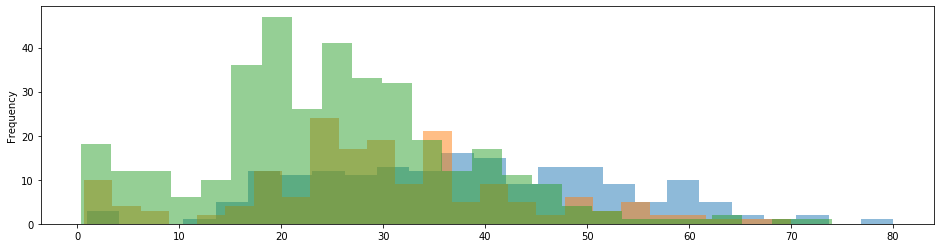

In [0]:
# Stacked Histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4),alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

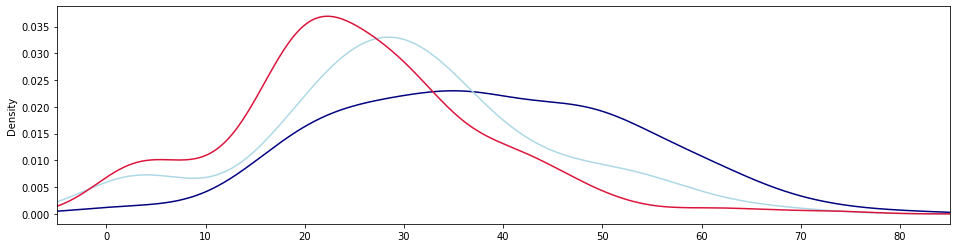

In [0]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5,85),figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5,85),figsize=(16,4), color='crimson');



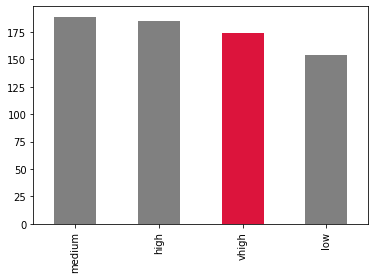

In [0]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar',color=['gray', 'gray', 'crimson', 'gray']);

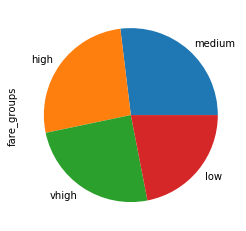

In [0]:
# pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

In [0]:
# Compare two categorical variables using crosstab
cab_death= pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


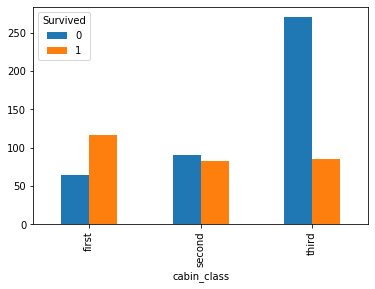

In [0]:
cab_death.plot(kind='bar');


In [0]:
# Crosstab with column percents.
cab_death1=pd.crosstab(df['cabin_class'],df['Survived'],normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


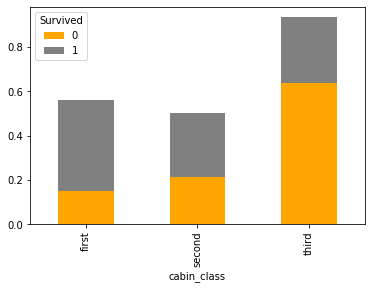

In [0]:
# make a stacked bar chart, for easy comparison of two categorical variables.
cab_death1.plot(kind='bar',stacked=True,color=['orange', 'gray']);


In [0]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


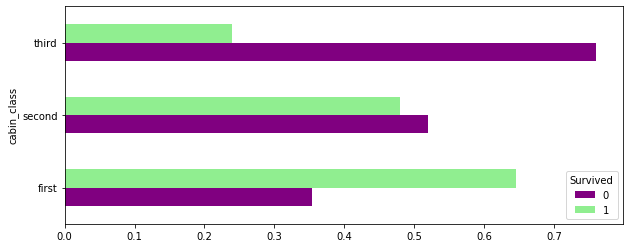

In [0]:
# A paired barchart for comparison of two categorical variables. Note the use of 'barh'.
cab_death2.plot(kind='barh',color=['purple', 'lightgreen'],figsize=(10,4));

In [0]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Now explore that continuous variable broken out by a categorical (i.e., categorical) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

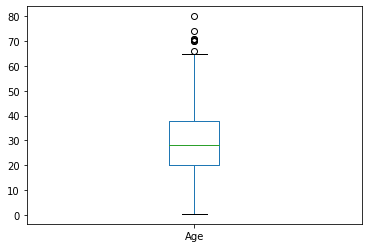

In [0]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

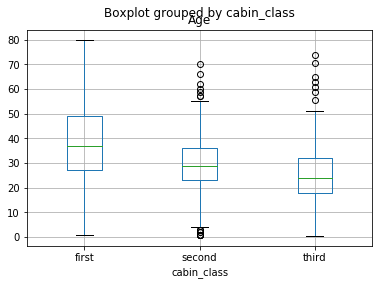

In [0]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age',by='cabin_class');


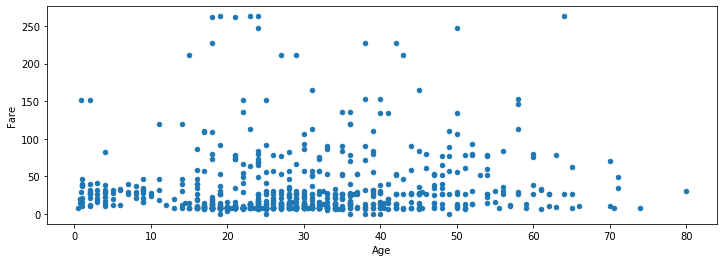

In [0]:
# Compare two or three continuous variables
# # Two continuous variables: age by fare
df.plot(kind='scatter',x='Age',y='Fare',figsize=(12,4));



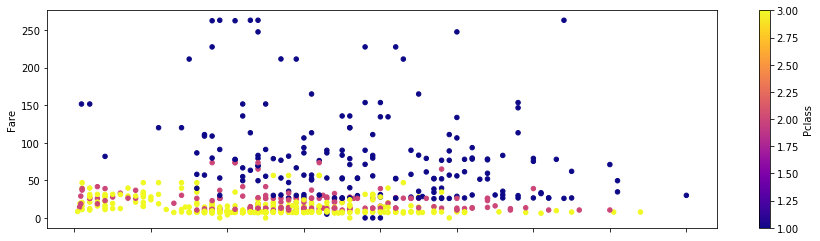

In [0]:
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
# Three variables: age, fare, and cabin class (color can be either continuous or categorical here).
df.plot(kind = 'scatter', x='Age', y='Fare', c='Pclass', colormap='plasma', figsize=(15,4));

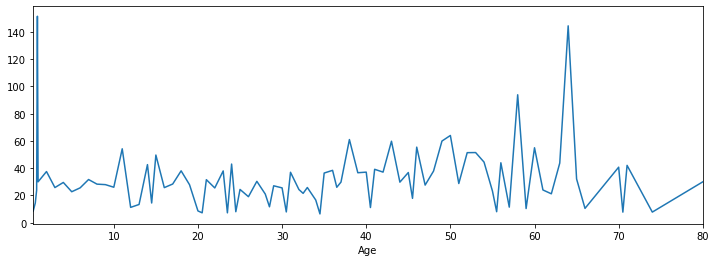

In [0]:
# Use a line plot to examine two continuous variables (often time)
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

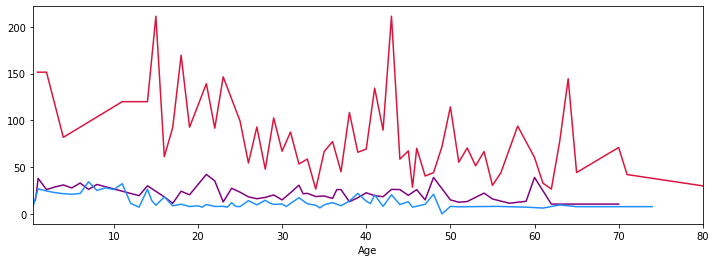

In [0]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

In [0]:
# Correlation Matrix
corr_matrix= df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


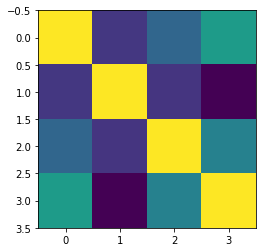

In [0]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

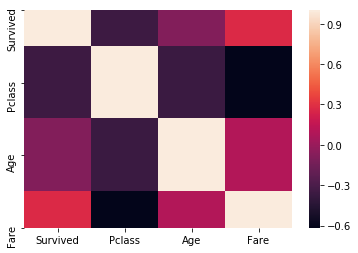

In [0]:
# But this actually is easier and better looking if you use seaborn code.
# More about seaborn further down.
sns.heatmap(corr_matrix);

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2


In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

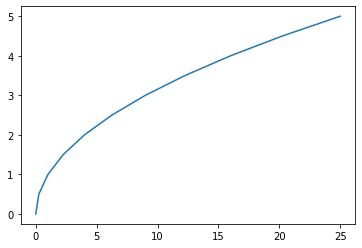

In [0]:
# Basic Matplotlib Commands
# a very simple plot, to get started. Notice that NO PANDAS is required!
plt.plot(y,x);

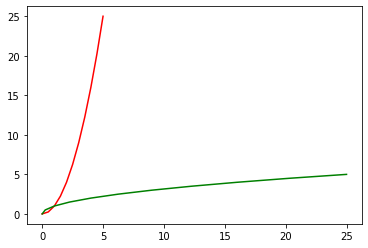

In [0]:
# we can have two 'plt' plots together (and let's add some color)
plt.plot(x,y,'r')
plt.plot(y,x,'g');


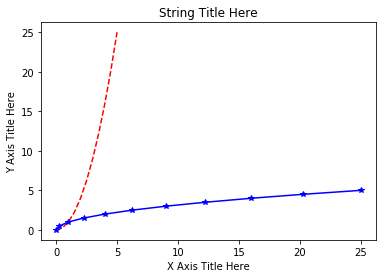

In [0]:
# Now add some labels, plus a little texture.
plt.plot(x, y, 'r--') 
plt.plot(y, x, 'b*-')
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here');

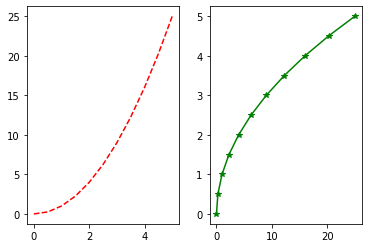

In [0]:
# The basic syntax goes like this: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(y,x,'g*-');

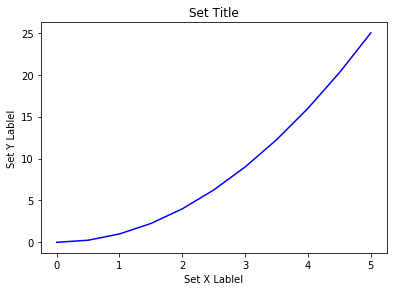

In [0]:
#  The .figure method
 # Create Figure (empty canvas)
 fig = plt.figure()
#   Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Plot on that set of axes
axes.plot(x,y,'b')
axes.set_xlabel('Set X Lablel')
axes.set_ylabel('Set Y Lablel')
axes.set_title('Set Title');

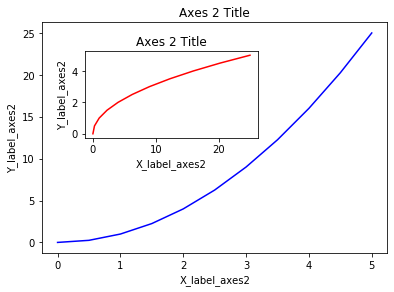

In [0]:
# Creates blank canvas
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

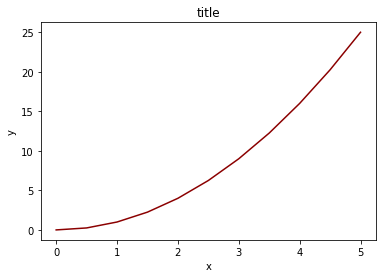

In [0]:
# The subplots() method
# fig , ax = plt.subplots()
# fig = fig.add_subplot(111)

# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig,axes = plt.subplots(nrows=1,ncols=1)

# Now use the axes object to add stuff to plot
axes.plot(x,y,'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');


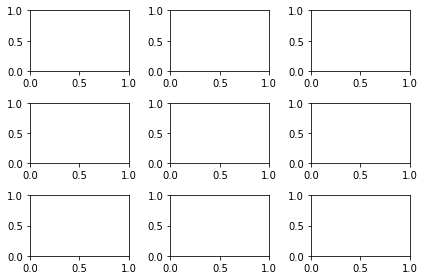

In [0]:
# Empty canvas of 1 by 2 subplots
fig, axes =plt.subplots(nrows=3, ncols=3)
fig
plt.tight_layout()

In [0]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f241168a3c8>,
      dtype=object)

In [0]:

# for ax in axes:
#     ax.plot(x, y, 'b')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_title('title')

# # Display the figure object    
# fig

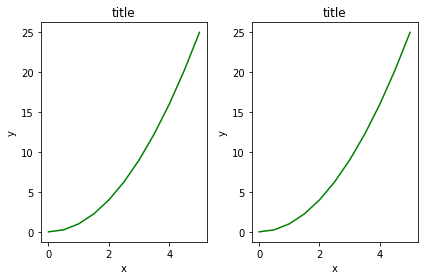

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_title('title')

  fig
  plt.tight_layout()

In [0]:
# Figure size, aspect ratio and DPI
fig = plt.figure(figsize=(8,4), dpi=100);

<Figure size 800x400 with 0 Axes>

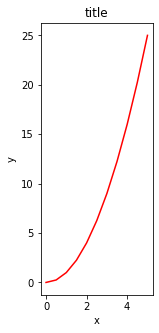

In [0]:
fig,axes = plt.subplots(figsize=(2,5))

axes.plot(x,y,'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

In [0]:
fig.savefig('filename.png')

In [0]:
fig.savefig('filename.jpg',dpi=200)

In [0]:
ax.set_title('title');
ax.set_xlabel('x')
ax.set_ylabel('y');

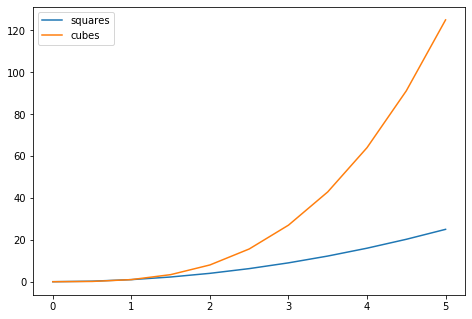

In [0]:
# legends
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x, x**2, label="squares")
ax.plot(x, x**3, label="cubes")
ax.legend(loc=2);



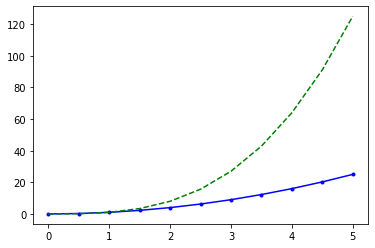

In [0]:
# matlab color & style
fig,ax=plt.subplots()
ax.plot(x,x**2,'b.-')
ax.plot(x,x**3,'g--');




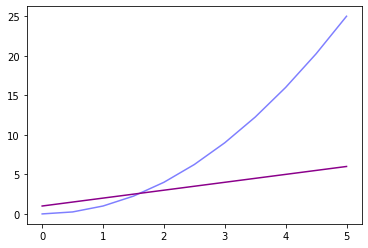

In [0]:
# color with color= parameter
fig,ax=plt.subplots()
ax.plot(x,x**2,color='blue',alpha=0.5)
ax.plot(x,x+1,color='#8B008B');



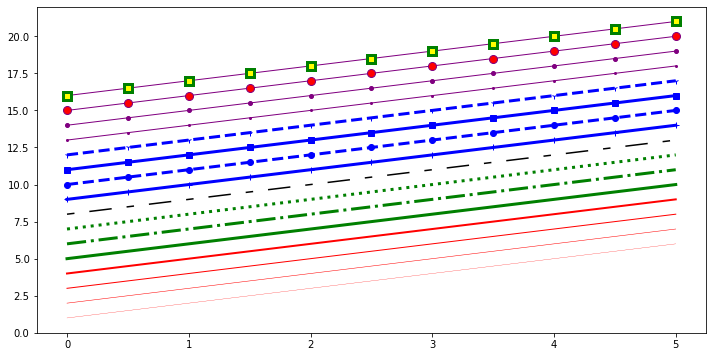

In [0]:
fig,ax=plt.subplots(figsize=(12,6))

# LINE & marker style
ax.plot(x,x+1,color='red',linewidth=0.25)
ax.plot(x,x+2,color='red',linewidth=0.50)
ax.plot(x,x+3,color='red',linewidth=1.00)
ax.plot(x,x+4,color='red',linewidth=2.00)


# #  linestype options 
ax.plot(x,x+5,color='green',lw=3,linestyle='-')
ax.plot(x,x+6,color='green',lw=3,linestyle='-.')
ax.plot(x,x+7,color='green',lw=3,linestyle=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) 

# Marker symbols 
ax.plot(x, x+ 9, color='blue', lw=3, ls='-', marker='+')
ax.plot(x, x+10, color='blue', lw=3, ls='--', marker='o')
ax.plot(x, x+11, color='blue', lw=3, ls='-', marker='s')
ax.plot(x, x+12, color='blue', lw=3, ls='--', marker='1')

# Marker size and color
ax.plot(x, x+13, color='purple', lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color='purple', lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color='purple', lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color='purple', lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor='yellow', markeredgewidth=3, markeredgecolor="green");

Text(0.5, 1.0, 'custom axes ranges')

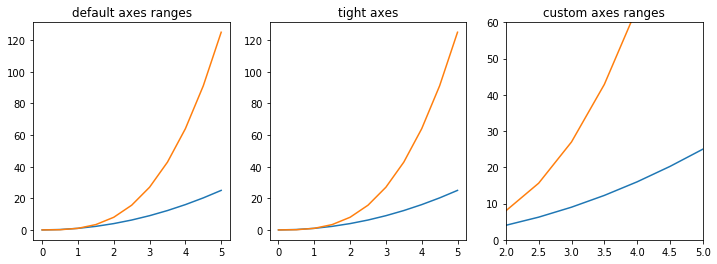

In [0]:
# control over axis appereance
fig,axes=plt.subplots(1,3,figsize=(12,4))
axes[0].plot(x,x**2,x,x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x,x**2,x,x**3)
axes[1].axis('tight')
axes[1].set_title('tight axes')


axes[2].plot(x,x**2,x,x**3)
axes[2].set_ylim(0,60)
axes[2].set_xlim(2,5)
axes[2].set_title('custom axes ranges')

In [0]:
from IPython.display import display,Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example=Image(url=url,width=400)
display(example)


In [0]:
# fake prototype
# check styles
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')



['seaborn', 'ggplot', 'seaborn-talk', 'seaborn-ticks', 'Solarize_Light2']


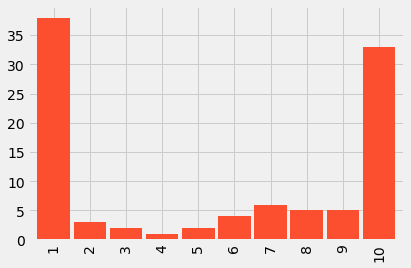

In [0]:
#  replicate blog pic
fake=pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
               index=range(1,11))
fake.plot.bar(color='C1',width=0.9);

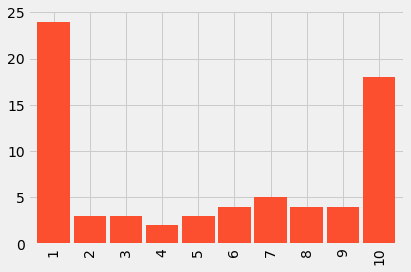

In [0]:
fake2=pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10
])

fake2.value_counts().sort_index().plot.bar(color='C1',width=0.9);


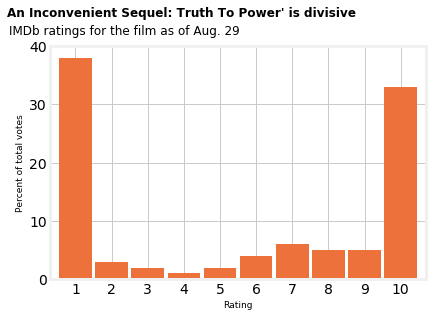

In [0]:
# annotation with text
fig ,ax=plt.subplots()
fig.patch.set(facecolor='white')

# bar setting
fake.plot.bar(color='#ED713A',width=0.9)
ax.set(facecolor='white')

# setting of title & subtitle
ax.set_title("An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')

ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42);

# x & y axes labels
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

# Fixing of x & y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
display(example)

In [0]:
# reproduce with real data
# reading data from 538's github repo
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')


In [0]:
# conversion of timestamp string to actual datetime objects
df['timestamp']=pd.to_datetime(df['timestamp'])

In [0]:
# timestamp as unique indentifier & selecting rows by timestamp
df.set_index('timestamp',inplace=True)


In [0]:
# selection of rows as below
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered= lastday[lastday['category']=='IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
#lastline (latest timestamp) of IMDb user ratings
final = lastday_filtered.tail(1)
final

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# get % columns
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T               

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# resetting the index to make it numeric
# reset the % columns for easy plotting
plot_data=final[pct_columns].T 
plot_data_index=range(1,11)
plot_data.columns=['percent']
plot_data


,percent
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


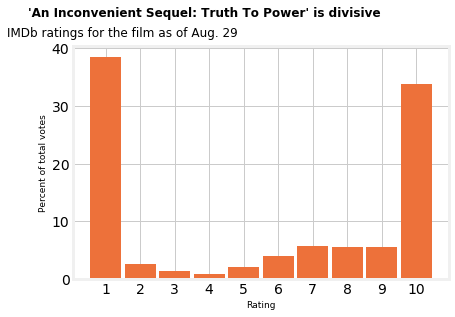

In [0]:
fig,ax=plt.subplots()

# figure bkgrnd color
fig.patch.set(facecolor='white')

# set the bars
ax.bar(x=range(1,11),height=plot_data['percent'], width=0.9, color="#ED713A")

# axes bkgnd color
ax.set(facecolor='white')

# set title & subtitle

ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# set x & y axes lables
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

# x & y axis tickmark & grid
ax.set_xticklabels(range(1,11),rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));



**assignment**

In [213]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv'
df=pd.read_csv(url)
print(df.tail())
df.columns

      age     n  alcohol-use  ...  meth-frequency  sedative-use  sedative-frequency
12  26-29  2628         80.7  ...            30.0           0.4                 4.0
13  30-34  2864         77.5  ...            54.0           0.4                10.0
14  35-49  7391         75.0  ...           104.0           0.3                10.0
15  50-64  3923         67.2  ...            30.0           0.2               104.0
16    65+  2448         49.3  ...               -           0.0                15.0

[5 rows x 28 columns]


Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [0]:
drug_col = ['age','marijuana-use',
            'pain-releiver-use','tranquilizer-use',
            'cocaine-use','crack-use','oxycontin-use',
            'stimulant-use','hallucinogen-use','sedative-use',
            'inhalant-use','meth-use','heroin-use']

In [216]:
df=df[drug_col]
df.tail()

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
12,26-29,20.8,8.3,4.2,3.2,0.4,1.2,2.3,3.2,0.4,0.6,0.6,0.6
13,30-34,16.4,5.9,3.6,2.1,0.5,0.9,1.4,1.8,0.4,0.4,0.4,0.4
14,35-49,10.4,4.2,1.9,1.5,0.5,0.3,0.6,0.6,0.3,0.3,0.2,0.1
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1
16,65+,1.2,0.6,0.2,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0


In [217]:
condition=(df['age']=='50-64')
dc = df[condition]
dc.head()

,age,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,50-64,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [0]:
dc1=dc.drop(columns='age')

In [219]:
dc1

,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [0]:
##### YOUR CODE HERE #####

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

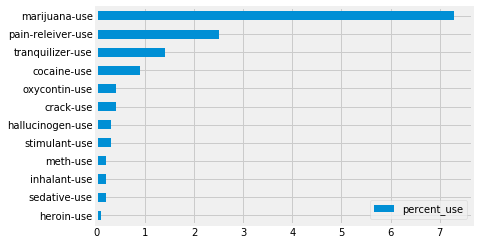

In [0]:
# plt.style.use('fast') 
dc2=dc1.T
dc2=dc2.rename(columns={15:'percent_use'})
dc2.sort_values(by=['percent_use']).plot(kind='barh');






In [0]:
# More Work Here